In [36]:
import numpy as np
import json
import pandas as pd

import os
import sys
sys.path.append('../../solvers/')
sys.path.append('../../src/')

from helper_functions import prettify_results, get_hyperparameter_list, read_process_results, read_results, analyze_data
import pdb

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', labelsize=14)
mpl.rc('axes', titlesize=14)
mpl.rc('figure', figsize=(6, 4))


In [37]:
true_value=[-.5, 1, .5, -.5]

savedir = './'
filename = 'blasius_kridge_hyper_numsamples.json'
filters = {'params.kernel': 'rbf', 'params.l1_reg': 0.001}
sortby = 'params.nsamp'
pickcols = ['x_list', 'loss_list', 'params.nsamp']
dataframe = read_process_results(filename=filename, savedir=savedir, filters=filters, sortby=sortby, pickcols=pickcols)
dataframe = dataframe.drop(30)

In [52]:
savedir = './'
filename = 'blasius_buckinet_hyper_numsamples.json'
buckinet_data = read_results(filename, savedir)
b_dataframe = pd.json_normalize(buckinet_data, max_level=1)
b_dataframe = b_dataframe[['x', 'loss', 'params.nsamp']]
b_dataframe = b_dataframe.sort_values(by='params.nsamp')
b_dataframe = b_dataframe.drop([2, 24])
b_dataframe['x_opt'] = b_dataframe['x'].apply(lambda x: np.array(x).T[0])
b_dataframe['final_loss'] = b_dataframe['loss'].apply(lambda x: x[0])
b_dataframe['final_mse'] = b_dataframe['loss'].apply(lambda x: x[1])

b_dataframe['x_opt_norm']   = b_dataframe.apply(lambda row: row.x_opt/row.x_opt[1], axis=1)
b_dataframe['error_opt']    = b_dataframe.apply(lambda row: np.linalg.norm(row.x_opt_norm - true_value, ord=2), axis=1) 
b_dataframe['error_mean']   = b_dataframe.apply(lambda row: np.mean(np.linalg.norm(row.x_opt_norm - np.array(true_value), ord=2) ), axis=1) 
b_dataframe['error_std']    = b_dataframe.apply(lambda row: np.std(np.linalg.norm(row.x_opt_norm - np.array(true_value), ord=2) ), axis=1) 

b_dataframe[['params.nsamp', 'x_opt_norm', 'error_sol', 'error_opt', 'error_mean', 'error_std', 'final_loss']]

KeyError: "['error_sol'] not in index"

In [53]:

dataframe = analyze_data(dataframe)
dataframe.style.format('{:.3f}')
dataframe[['params.nsamp', 'x_norm', 'error_sol', 'error_opt', 'error_mean', 'error_std', 'num_net', 'loss_opt']]


,params.nsamp,x_norm,error_sol,error_opt,error_mean,error_std,num_net,loss_opt
24,10,"[[-0.5396838534340089, 1.0, 0.460316146565991,...",0.008221,0.263107,0.087312,0.104413,4,0.000350
35,15,"[[-0.5435901236613889, 1.0, 0.4564098763386112...",0.000039,0.024074,0.033204,0.031476,3,0.000603
38,20,"[[-0.17574428064684394, 1.0, 0.824255719353156...",0.042661,0.043451,0.146884,0.207372,5,0.000867
33,25,"[[-0.5141286752916936, 1.0, 0.4858713247083064...",0.024200,0.025601,0.024747,0.000535,5,0.000865
42,30,"[[-0.5083939723859685, 1.0, 0.4916060276140315...",0.014539,0.029469,1.291563,2.089695,7,0.000802
36,35,"[[-0.4805818162077529, 1.0, 0.519418183792247,...",0.033633,0.034243,0.034349,0.000386,6,0.001002
23,50,"[[-8.337009467150308, 1.0, -7.337009467150308,...",0.032089,0.032554,3.417710,5.863794,4,0.001017
43,60,"[[-0.5004139905735834, 1.0, 0.4995860094264166...",0.000717,0.025585,0.020384,0.009842,5,0.000882
34,65,"[[-0.034449916911475024, 1.0, 0.96555008308852...",0.026150,0.026150,0.416253,0.390103,2,0.001189
31,75,"[[-0.49119821516658385, 1.0, 0.508801784833416...",0.015245,0.025165,0.022073,0.004835,3,0.000937


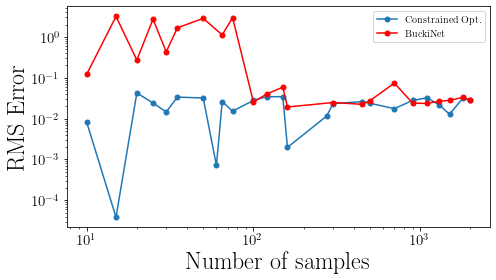

In [54]:

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.nsamp'], dataframe['error_sol'], '.-', markersize=10)
ax.loglog(b_dataframe['params.nsamp'], b_dataframe['error_opt'], 'r.-', markersize=10)
# ax.set_ylim([0, .8])

ax.set_xlabel('Number of samples', fontsize=24)
ax.set_ylabel('RMS Error', fontsize=24)
ax.legend(['Constrained Opt.', 'BuckiNet'])
plt.tight_layout()
plt.show()

fig.savefig('Error_vs_numsamp.pdf')


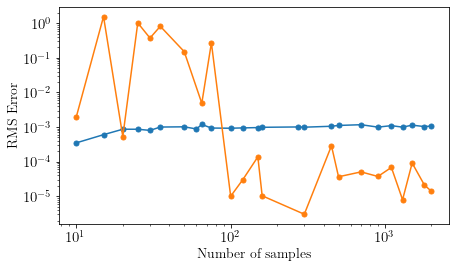

In [55]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.nsamp'], dataframe['loss_opt'], '.-', markersize=10)
ax.loglog(b_dataframe['params.nsamp'], b_dataframe['final_loss'], '.-', markersize=10)
# ax.set_ylim([0, .8])
ax.set_xlabel('Number of samples')
ax.set_ylabel('RMS Error')
plt.show()

fig.savefig('Loss_vs_numsamp.pdf')

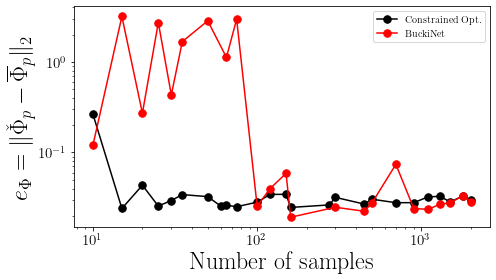

In [56]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
ax.loglog(dataframe['params.nsamp'], dataframe['error_opt'], 'k.-', markersize=15)
ax.loglog(b_dataframe['params.nsamp'], b_dataframe['error_opt'], 'r.-', markersize=15)
# ax.set_ylim([0, .8])
ax.set_xlabel('Number of samples', fontsize=24)
ax.set_ylabel(r'$e_\Phi = \| \check{ \Phi}_p - \overline{ \Phi}_p\|_2$', fontsize=24)
ax.legend(['Constrained Opt.', 'BuckiNet'])
plt.tight_layout()
plt.show()

fig.savefig('error_opt_vs_numsamp.pdf')
